In [11]:
import pandas as pd

url = 'london_weather.csv'
data = pd.read_csv(url)

print("rows:",data.shape[0]," columns:", data.shape[1])
print(data.info())
print(data.columns)

rows: 15341  columns: 10
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       15322 non-null  float64
 2   sunshine          15341 non-null  float64
 3   global_radiation  15322 non-null  float64
 4   max_temp          15335 non-null  float64
 5   mean_temp         15305 non-null  float64
 6   min_temp          15339 non-null  float64
 7   precipitation     15335 non-null  float64
 8   pressure          15337 non-null  float64
 9   snow_depth        13900 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB
None
Index(['date', 'cloud_cover', 'sunshine', 'global_radiation', 'max_temp',
       'mean_temp', 'min_temp', 'precipitation', 'pressure', 'snow_depth'],
      dtype='object')


In [12]:
print(data.head())

       date  cloud_cover  sunshine  global_radiation  max_temp  mean_temp  \
0  19790101          2.0       7.0              52.0       2.3       -4.1   
1  19790102          6.0       1.7              27.0       1.6       -2.6   
2  19790103          5.0       0.0              13.0       1.3       -2.8   
3  19790104          8.0       0.0              13.0      -0.3       -2.6   
4  19790105          6.0       2.0              29.0       5.6       -0.8   

   min_temp  precipitation  pressure  snow_depth  
0      -7.5            0.4  101900.0         9.0  
1      -7.5            0.0  102530.0         8.0  
2      -7.2            0.0  102050.0         4.0  
3      -6.5            0.0  100840.0         2.0  
4      -1.4            0.0  102250.0         1.0  


In [13]:
print(data.isnull().sum())

date                   0
cloud_cover           19
sunshine               0
global_radiation      19
max_temp               6
mean_temp             36
min_temp               2
precipitation          6
pressure               4
snow_depth          1441
dtype: int64


In [14]:
# data_cleaned = data.dropna()
# print("rows after dropping NaN:", data_cleaned.shape[0])

In [15]:
# Data Preprocessing:
# Handle any missing values in the time series data.
# Resample the data to a uniform time interval if necessary (e.g., daily, weekly).

data['date'] = pd.to_datetime(data['date'], format='%Y%m%d')
data.set_index('date', inplace=True)

data.interpolate(method='linear', inplace=True)

resampled_data = data.resample('W').agg({
    'cloud_cover': 'mean',
    'sunshine': 'mean',
    'global_radiation': 'mean',
    'max_temp': 'mean',
    'mean_temp': 'mean',
    'min_temp': 'mean',
    'precipitation': 'sum',
    'pressure': 'mean',
    'snow_depth': 'mean'
})

print(resampled_data.head())
resampled_data.to_csv('resampled_weather_data_weekly.csv')

            cloud_cover  sunshine  global_radiation  max_temp  mean_temp  \
date                                                                       
1979-01-07     5.714286  2.071429         26.571429  3.900000  -1.700000   
1979-01-14     4.428571  4.000000         39.285714  4.542857   1.957143   
1979-01-21     7.714286  0.000000         15.428571  3.657143   2.228571   
1979-01-28     6.000000  1.800000         33.142857  3.214286  -0.428571   
1979-02-04     5.142857  1.942857         37.571429  5.828571   2.171429   

            min_temp  precipitation       pressure  snow_depth  
date                                                            
1979-01-07 -6.000000            6.3  102124.285714    3.571429  
1979-01-14 -0.871429           13.2  100914.285714    0.428571  
1979-01-21  0.085714           12.0  102024.285714    0.000000  
1979-01-28 -3.557143           21.5  100262.857143    2.000000  
1979-02-04 -1.328571           17.0  100084.285714    0.000000  


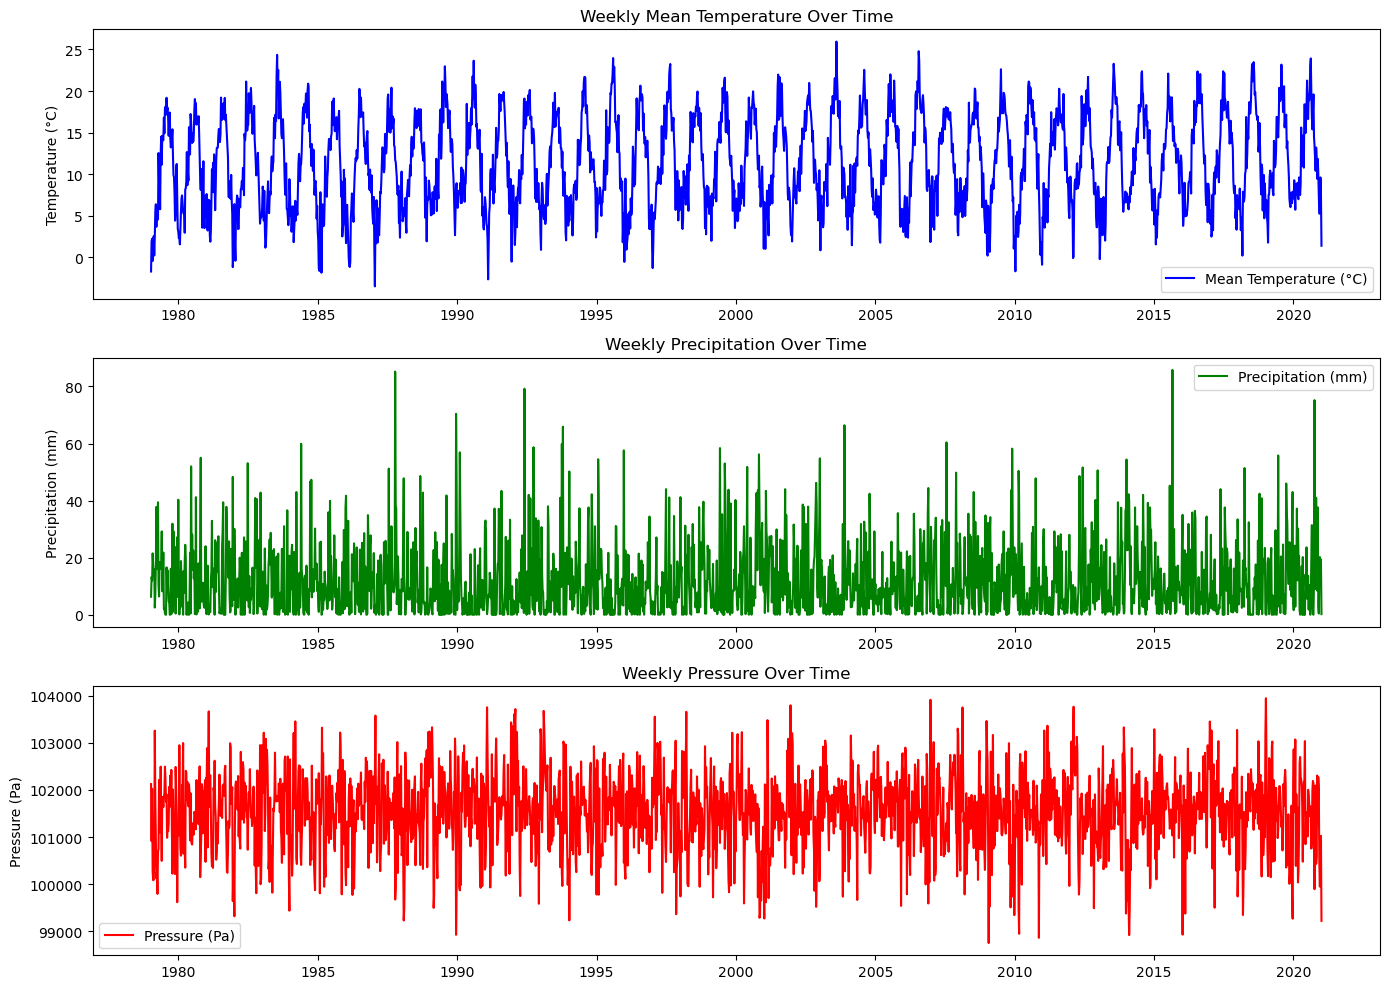

<Figure size 1200x800 with 0 Axes>

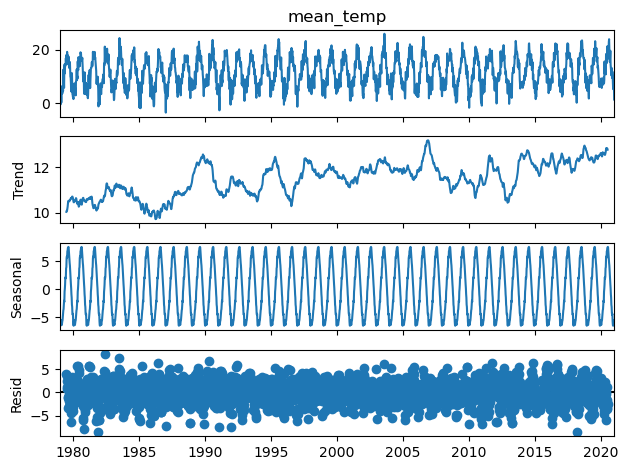

In [16]:
# Exploratory Data Analysis:
# Visualize the time series data using line plots to identify trends, seasonality, and patterns.
# Decompose the time series into trend, seasonality, and residuals using seasonal decomposition.
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

resampled_data = pd.read_csv('resampled_weather_data_weekly.csv', index_col='date', parse_dates=True)

plt.figure(figsize=(14, 10))

plt.subplot(3, 1, 1)
plt.plot(resampled_data.index, resampled_data['mean_temp'], label='Mean Temperature (°C)', color='b')
plt.title('Weekly Mean Temperature Over Time')
plt.ylabel('Temperature (°C)')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(resampled_data.index, resampled_data['precipitation'], label='Precipitation (mm)', color='g')
plt.title('Weekly Precipitation Over Time')
plt.ylabel('Precipitation (mm)')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(resampled_data.index, resampled_data['pressure'], label='Pressure (Pa)', color='r')
plt.title('Weekly Pressure Over Time')
plt.ylabel('Pressure (Pa)')
plt.legend()

plt.tight_layout()
plt.show()

decomposed_result = seasonal_decompose(resampled_data['mean_temp'], model='additive', period=52)  # Период 52 для недельного анализа

plt.figure(figsize=(12, 8))
decomposed_result.plot()
plt.show()

ADF Statistic: -18.459114451396296
p-value: 2.1480723416195068e-30


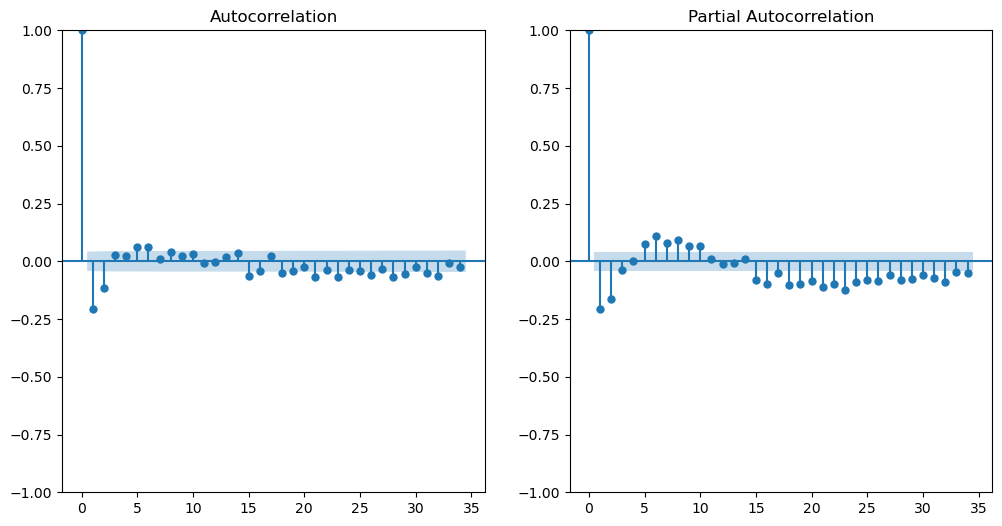

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              mean_temp   No. Observations:                 2192
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -5054.164
Date:                Thu, 31 Oct 2024   AIC                          10114.329
Time:                        17:36:32   BIC                          10131.405
Sample:                    01-07-1979   HQIC                         10120.570
                         - 01-03-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1696      0.077      2.197      0.028       0.018       0.321
ma.L1         -0.4274      0.071     -6.009      0.000      -0.567      -0.288
sigma2         5.9041      0.173     34.204      0.0

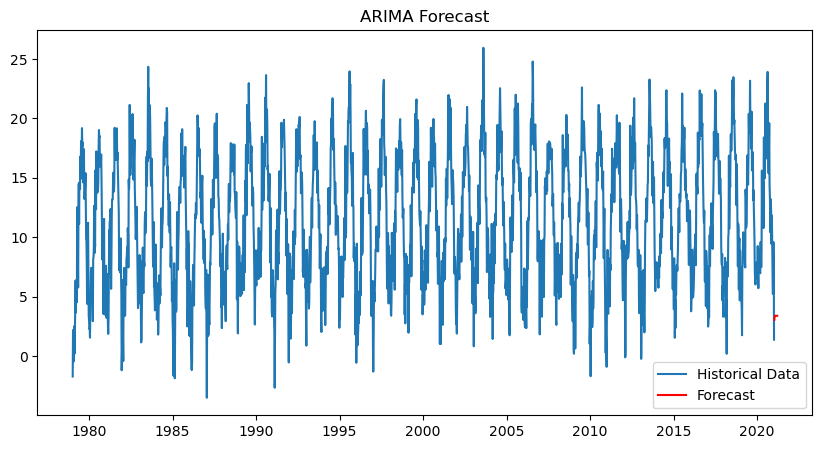

In [18]:
# Modeling:
# Implement forecasting techniques, such as:
# ARIMA Model: Fit an ARIMA model to the data and determine the appropriate parameters (p, d, q).
# Exponential Smoothing: Use Holt-Winters method for forecasting seasonal data.
# Machine Learning Approach: Implement a model using scikit-learn (e.g., Random Forest, LSTM for deep learning).
# 1. ARIMA Model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

resampled_data = pd.read_csv('resampled_weather_data_weekly.csv', index_col='date', parse_dates=True)

result = adfuller(resampled_data['mean_temp'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

resampled_data['mean_temp_diff'] = resampled_data['mean_temp'].diff().dropna()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_acf(resampled_data['mean_temp_diff'].dropna(), ax=plt.gca())
plt.subplot(1, 2, 2)
plot_pacf(resampled_data['mean_temp_diff'].dropna(), ax=plt.gca())
plt.show()

# Устанавливаем значения для параметров
p = 1  # Пример: на основе анализа PACF-графика
d = 1  # Пример: если сделали одну разность
q = 1  # Пример: на основе анализа ACF-графика

model = ARIMA(resampled_data['mean_temp'], order=(p, d, q))
model_fit = model.fit()
print(model_fit.summary())

forecast = model_fit.forecast(steps=10)
plt.figure(figsize=(10, 5))
plt.plot(resampled_data['mean_temp'], label='Historical Data')
plt.plot(forecast, label='Forecast', color='red')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()



/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


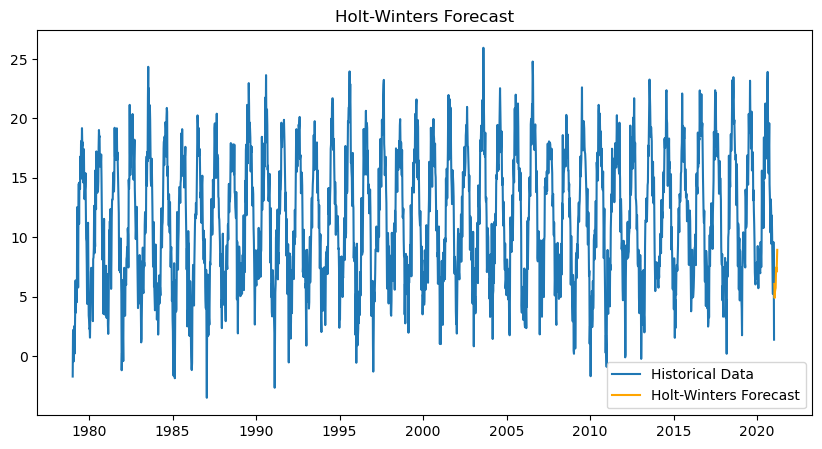

In [20]:
# 2. Exponential Smoothing (Holt-Winters Method)
from statsmodels.tsa.holtwinters import ExponentialSmoothing

hw_model = ExponentialSmoothing(resampled_data['mean_temp'], seasonal='add', seasonal_periods=52)
hw_model_fit = hw_model.fit()

hw_forecast = hw_model_fit.forecast(steps=10)  # Прогноз на 10 шагов

plt.figure(figsize=(10, 5))
plt.plot(resampled_data['mean_temp'], label='Historical Data')
plt.plot(hw_forecast, label='Holt-Winters Forecast', color='orange')
plt.title('Holt-Winters Forecast')
plt.legend()
plt.show()

Mean Squared Error: 5.672847983438708


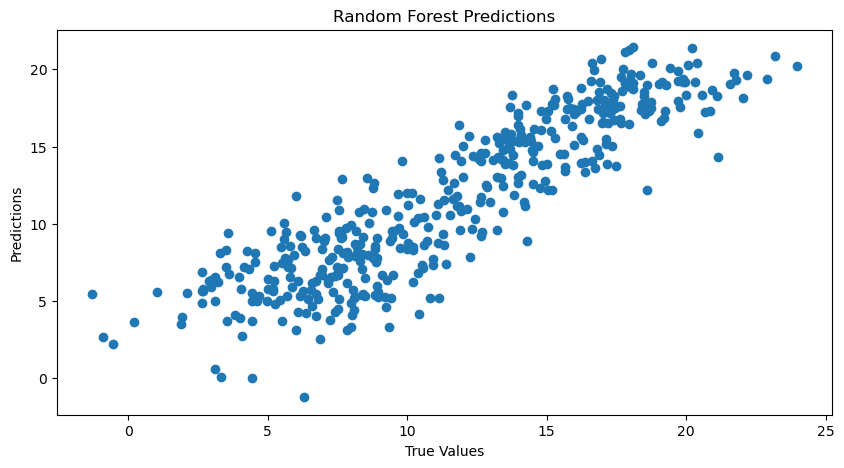

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

resampled_data['month'] = resampled_data.index.month
resampled_data['day'] = resampled_data.index.day
resampled_data['year'] = resampled_data.index.year
resampled_data['week'] = resampled_data.index.isocalendar().week  # Исправлено здесь

X = resampled_data[['month', 'day', 'year', 'week']]
y = resampled_data['mean_temp']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Random Forest Predictions')
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


Mean Absolute Error (MAE): 6.329889791525442
Root Mean Squared Error (RMSE): 7.679673392110669
Mean Absolute Percentage Error (MAPE): 131.30616860630525%


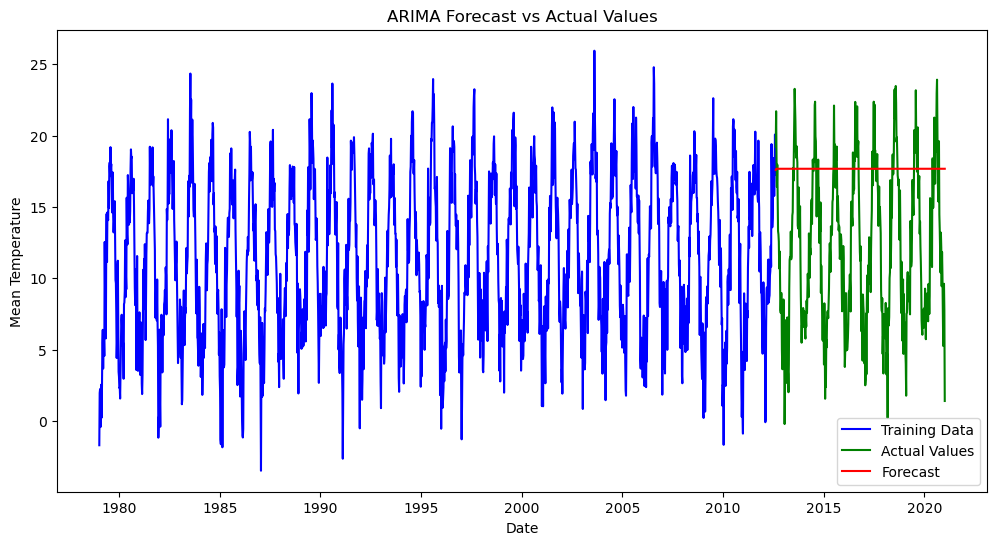

In [24]:
# Model Evaluation:
# Split the dataset into training and testing sets.
# Evaluate the forecast accuracy using metrics such as MAE, RMSE, and MAPE.
# Visualize the predicted vs. actual values.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

resampled_data = pd.read_csv('resampled_weather_data_weekly.csv', index_col='date', parse_dates=True)

train_size = int(len(resampled_data) * 0.8)
train, test = resampled_data.iloc[:train_size], resampled_data.iloc[train_size:]

p, d, q = 1, 1, 1 
model = ARIMA(train['mean_temp'], order=(p, d, q))
model_fit = model.fit()

forecast = model_fit.forecast(steps=len(test))

mae = mean_absolute_error(test['mean_temp'], forecast)
rmse = np.sqrt(mean_squared_error(test['mean_temp'], forecast))
mape = np.mean(np.abs((test['mean_temp'] - forecast) / test['mean_temp'])) * 100

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')

plt.figure(figsize=(12, 6))
plt.plot(train['mean_temp'], label='Training Data', color='blue')
plt.plot(test['mean_temp'], label='Actual Values', color='green')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.title('ARIMA Forecast vs Actual Values')
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.legend()
plt.show()
